## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pickle

from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,
                             f1_score,cohen_kappa_score,roc_auc_score,roc_curve)

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
df_past=pd.read_csv(r"C:\Users\MY\Downloads\ML2\Day 5 - Inclass - Case Study\Day 5\INNHotelsGroup_pastdata.csv")
df_new=pd.read_csv(r"C:\Users\MY\Downloads\ML2\Day 5 - Inclass - Case Study\Day 5\INNHotelsGroup_newdata.csv")

In [4]:
df_new.set_index('booking_id',inplace=True)
df_new.head(3)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
booking_id,,,,,,,,,,
INNHG_128127,4,Online,1,103.0,1,0,2022-07-01,1,1,Not Canceled
INNHG_128128,147,Online,2,103.7,2,2,2022-07-01,0,2,Not Canceled
INNHG_128129,43,Online,1,126.9,2,1,2022-07-01,1,2,Not Canceled


In [5]:
df_past.set_index('booking_id',inplace=True)
df_past.head(3)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
booking_id,,,,,,,,,,,
INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN


In [6]:
shape_1=df_past.shape
print(f'Past Data --> Rows:{shape_1[0]}   Columns:{shape_1[1]}')


Past Data --> Rows:27093   Columns:11


In [7]:
shape_1=df_new.shape
print(f'new Data --> Rows:{shape_1[0]}   Columns:{shape_1[1]}')

new Data --> Rows:3583   Columns:10


## Explore the Dataset


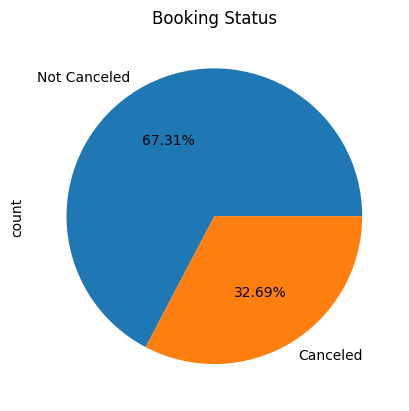

In [8]:
# How many canceled booking were reeboked

df_past['booking_status'].value_counts().plot(kind='pie',autopct="%0.2f%%")
plt.title("Booking Status")
plt.show()

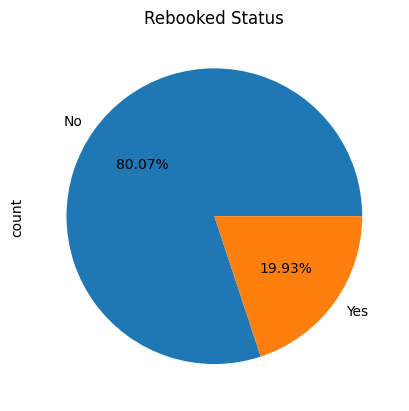

In [9]:
df_past[df_past['booking_status']=='Canceled']['rebooked'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.title("Rebooked Status")
plt.show()

#### Inference

Out of Total booking made from 01-Jan-2021 to 30-06-2022 ~33% were canceled

Out of these 33% Canceled booking ~20% were rebooked while ~80 booking were inventory loss

In [10]:
# We can Drop the coloumn rebooked as its not required in predictive modelling
df_past.drop(columns=['rebooked'],inplace=True)

## Univariate Analysis

In [11]:
df_past.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'arrival_date', 'required_car_parking_space', 'no_of_week_nights',
       'booking_status'],
      dtype='object')

In [12]:
num_cols= ['lead_time','avg_price_per_room']
cat_cols= ['market_segment_type','no_of_special_requests','no_of_adults','no_of_weekend_nights','arrival_date', 
           'required_car_parking_space', 'no_of_week_nights','booking_status']

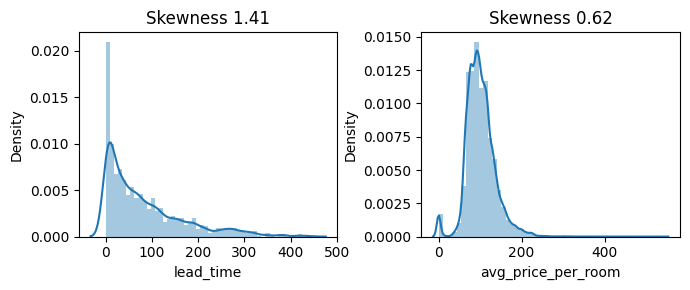

In [13]:
t=1
plt.figure(figsize=(7,3))
for i in num_cols:
    plt.subplot(1,2,t)
    sns.distplot(df_past[i])
    plt.title(f"Skewness {np.round(df_past[i].skew(),2)}")
    t += 1
plt.tight_layout()
plt.show()


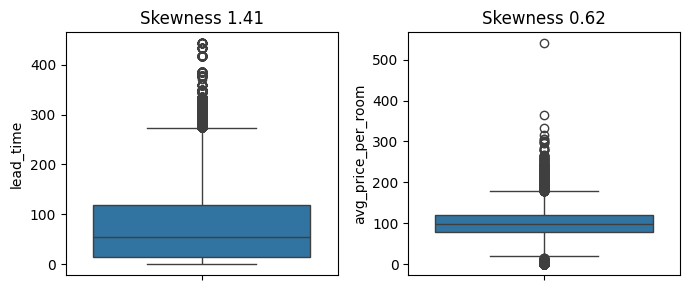

In [14]:
t=1
plt.figure(figsize=(7,3))
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(df_past[i])
    plt.title(f"Skewness {np.round(df_past[i].skew(),2)}")
    t += 1
plt.tight_layout()
plt.show()


In [15]:
'''
t=1

for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(df_past[i])
    t = t+1
plt.tight_layout()    
plt.show()
'''

'\nt=1\n\nfor i in cat_cols:\n    plt.subplot(4,2,t)\n    sns.countplot(df_past[i])\n    t = t+1\nplt.tight_layout()    \nplt.show()\n'

#### Inference

* There is positive Skewness in Lead time and Average price per room 

* In the boxplot we can see that the skewness is because of some extreme outliers present on upper tail of a data

* Most of the booking have been made online

* Most of the guest doesn't have special requirements or Need a car parking Space

* Most of the booking has been made fro 2 Adults

* Most of the booking inclue 0,1,2 weekend Nights and 1,2,3 week nights

## Bivariate Analysis

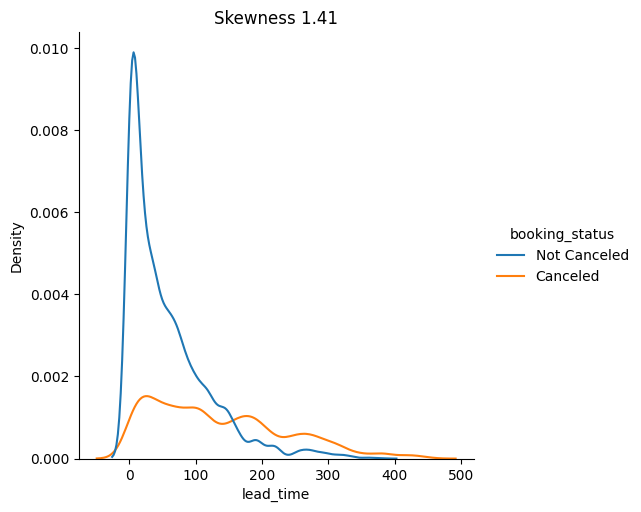

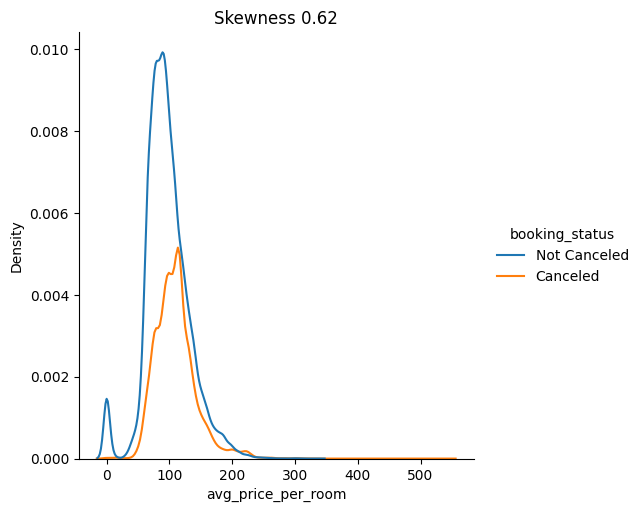

In [16]:
# Num Vs Cat

for i in num_cols:
    sns.displot(data=df_past,x=i,kind='kde',hue='booking_status')
    plt.title(f"Skewness {np.round(df_past[i].skew(),2)}")
    t += 1
    plt.show()

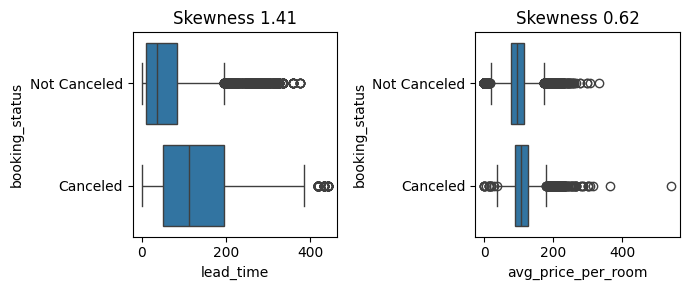

In [17]:
t=1
plt.figure(figsize=(7,3))
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(data=df_past,x=i,y='booking_status')
    plt.title(f"Skewness {np.round(df_past[i].skew(),2)}")
    t += 1
plt.tight_layout()
plt.show()

#### Infrences

* The Booking with higher lead time have high chances for Cancellation
* There are extreme Outliers in Avg price per room where booking is Canceled
* Booking with lead time greater than 400 are canceled
* Booking with avg room price greater than 350 are canceled

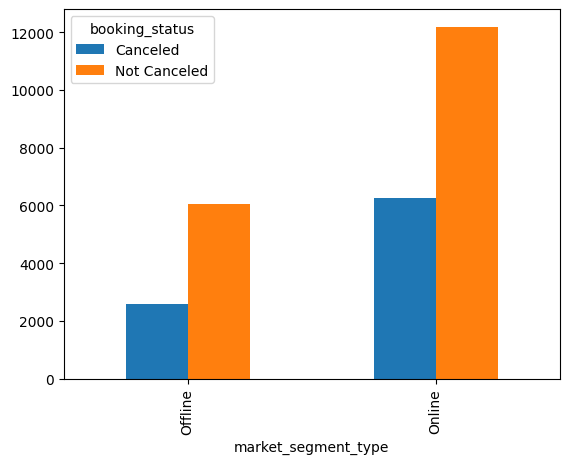

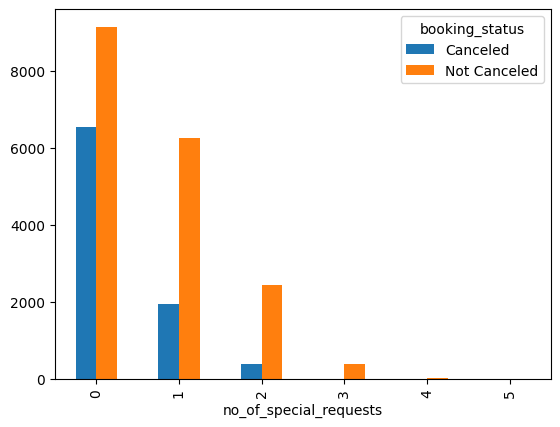

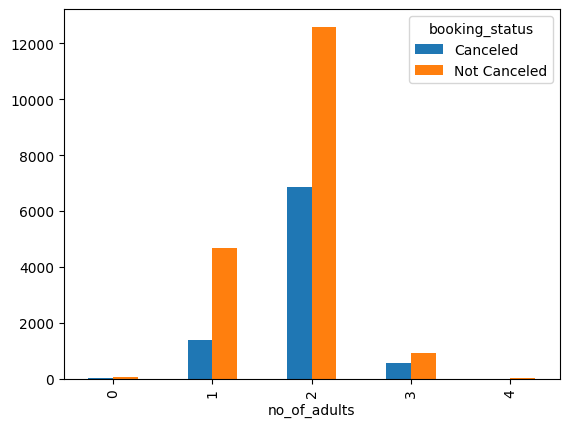

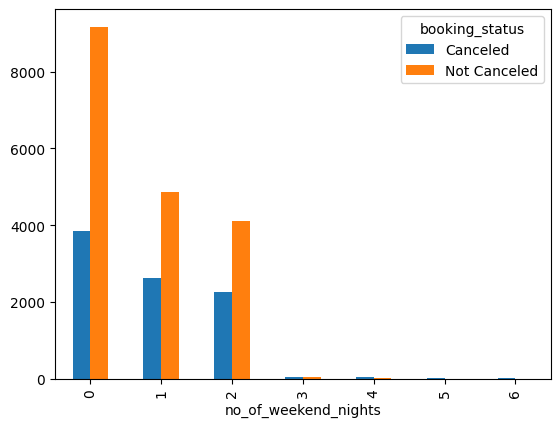

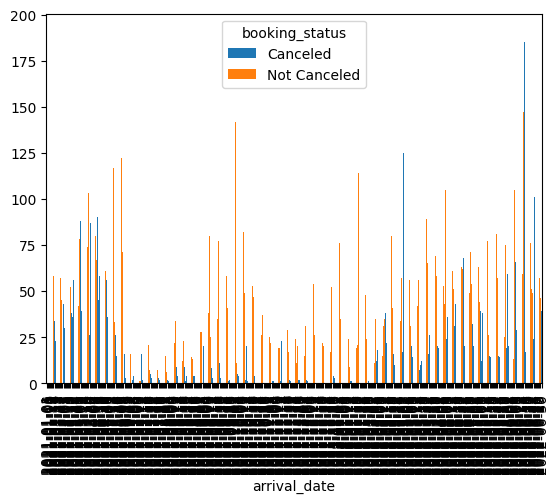

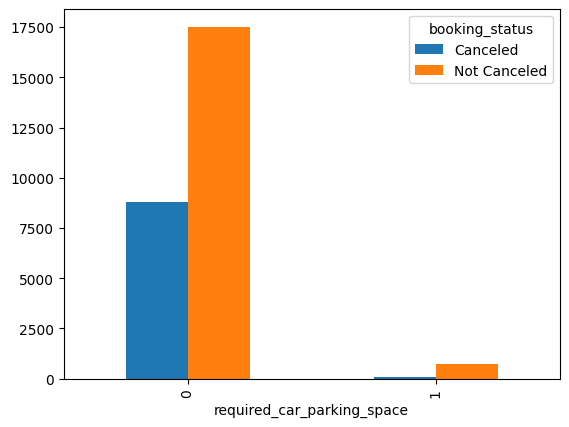

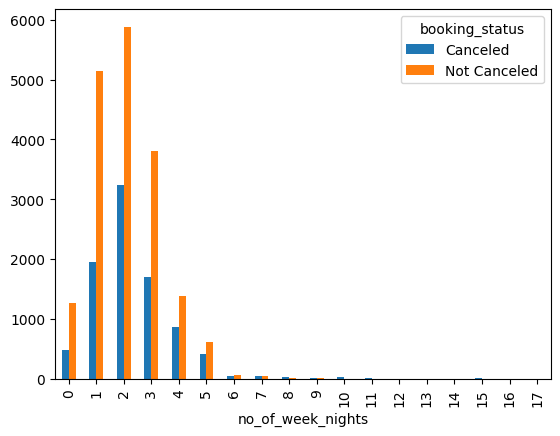

In [18]:
for i in cat_cols:
    if i!= 'booking_status':
        pd.crosstab(index=df_past[i],columns=df_past['booking_status']).plot(kind='bar')

There are more booking canceled when no of request are 0

## Infrential Statistics

In [19]:
# To test Booking with larger leads times are more prone to get cancelled
# Mu1 = Avg lead time of canceled booking
# Mu2 = Avg lead time of not cancelled booking

sample1=df_past[df_past['booking_status']=='Canceled']['lead_time']
sample2=df_past[df_past['booking_status']!='Canceled']['lead_time']

In [20]:
# First we need to check the assumption
print(stats.shapiro(df_past['lead_time']))
print(stats.levene(sample1,sample2))


# Both assumption are failed so we use mannwhitnue test

ShapiroResult(statistic=0.8447704281157536, pvalue=8.037706687701978e-94)
LeveneResult(statistic=3210.120590252021, pvalue=0.0)


In [21]:
# To test Booking with larger leads times are more prone to get cancelled
# Mu1 = Avg lead time of canceled booking
# Mu2 = Avg lead time of not cancelled booking

# Ho mu1>=mu2
# ha mu1<mu2
tstat,p_value = stats.mannwhitneyu(sample1,sample2,alternative='less')

# With 95% Confidence level

if p_value>0.05:
    print('Failed to reject H0')

else:
    print('Reject Ho')

Failed to reject H0


## Data Preprocessing

Check for missing value

In [22]:
df_past.isnull().sum().sum()

0

In [23]:
df_new.isnull().sum().sum()

0

Drop duplicate rows

In [24]:
df_past.drop_duplicates(inplace=True)

In [25]:
df_new.drop_duplicates(inplace=True)

Drop the Outliers

In [26]:
for i in num_cols:
    q3,q1=np.percentile(df_past[i],[75,25])
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr

    df_past[i]=df_past[i].apply(lambda x: ul if x>ul else ll if x<ll else x)


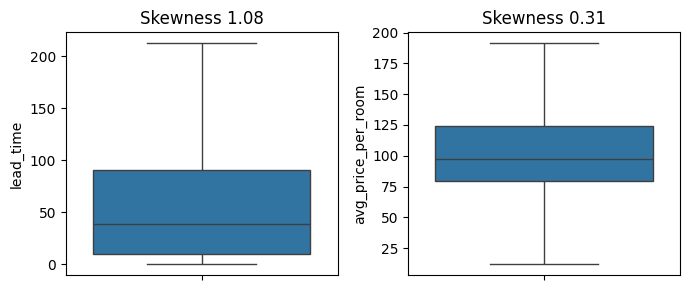

In [27]:
t=1
plt.figure(figsize=(7,3))
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(df_past[i])
    plt.title(f"Skewness {np.round(df_past[i].skew(),2)}")
    t += 1
plt.tight_layout()
plt.show()

## Feature Engineering

Preprocessing Arrival date to Day , Month and weekday

In [28]:
df_past['arrival_date']=pd.to_datetime(df_past['arrival_date'])
df_new['arrival_date']=pd.to_datetime(df_new['arrival_date'])

In [29]:
# Past data 
df_past['arrival_day']=df_past['arrival_date'].dt.day
df_past['arrival_month']=df_past['arrival_date'].dt.month
df_past['arrival_weekday']=df_past['arrival_date'].dt.weekday

# New data 
df_new['arrival_day']=df_new['arrival_date'].dt.day
df_new['arrival_month']=df_new['arrival_date'].dt.month
df_new['arrival_weekday']=df_new['arrival_date'].dt.weekday

In [30]:
# Drop Arrival Date
df_past.drop(columns=['arrival_date'],inplace=True)
df_new.drop(columns=['arrival_date'],inplace=True)

## Encoding

In [31]:
df_past["market_segment_type"]=df_past["market_segment_type"].map({'Online':1,'Offline':0})
df_new["market_segment_type"]=df_new["market_segment_type"].map({'Online':1,'Offline':0})

In [32]:
df_past['booking_status']=df_past["booking_status"].map({'Canceled':1,'Not Canceled':0})
df_new['booking_status']=df_new["booking_status"].map({'Canceled':1,'Not Canceled':0})

## Train Test Split

In [33]:
x_train=df_past.drop(columns=['booking_status'])
y_train=df_past['booking_status']

x_test=df_new.drop(columns=['booking_status'])
y_test=df_new['booking_status']

In [34]:
print(x_test.shape,y_test.shape,x_train.shape,y_train.shape)

(3132, 11) (3132,) (18655, 11) (18655,)


In [35]:
y_train.value_counts(normalize=True)

booking_status
0    0.711337
1    0.288663
Name: proportion, dtype: float64

In [36]:
weights=y_train.shape[0]/(2*y_train.value_counts()[0]),y_train.shape[0]/(2*y_train.value_counts()[1])
weights_dict={k:v for k,v in zip(range(2),weights)}
weights_dict

{0: 0.7029012810851545, 1: 1.7321262766945218}

## Predictive Modeling

In [37]:
mod=[]
accu=[]
recall=[]
precision=[]
cohen_kappa=[]
f1=[]


def model_training(model,xtrain,ytrain,xtest,ytest):
    trained_model=model
    trained_model.fit(xtrain,ytrain)

    pred_h=trained_model.predict(xtest)
    pred_s=trained_model.predict_proba(xtest)[:,1]

    print("Confusion_matrix :\n",confusion_matrix(ytest,pred_h))
    print("\nClassification Report\n",classification_report(ytest,pred_h))

    fpr,tpr,thres=roc_curve(ytest,pred_s)

    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.title(f"ROC AUC {np.round(roc_auc_score(ytest,pred_s),2)}")
    plt.show()

    y_n=input("Do you want to save the result? Y/N")
    
    if y_n.lower()=='y':
        accu.append(accuracy_score(ytest,pred_h))
        mod.append(str(model))
        recall.append(recall_score(ytest,pred_h))
        precision.append(precision_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        cohen_kappa.append(cohen_kappa_score(ytest,pred_h))

        global scorecard

        scorecard=pd.DataFrame({"Accuracy":accu,"Precision":precision,"Recall":recall,"F1 Score":f1,"Cohen_Kappa Score":cohen_kappa},index=mod)
    else:
        return


In [38]:
def tunning_Parameters(grid,estimator,x,y,score='f1'):
    gscv=GridSearchCV(estimator=estimator,param_grid=grid,verbose=1,scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_


### Logistic Regression

Confusion_matrix :
 [[1924  200]
 [ 482  526]]

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      2124
           1       0.72      0.52      0.61      1008

    accuracy                           0.78      3132
   macro avg       0.76      0.71      0.73      3132
weighted avg       0.78      0.78      0.77      3132



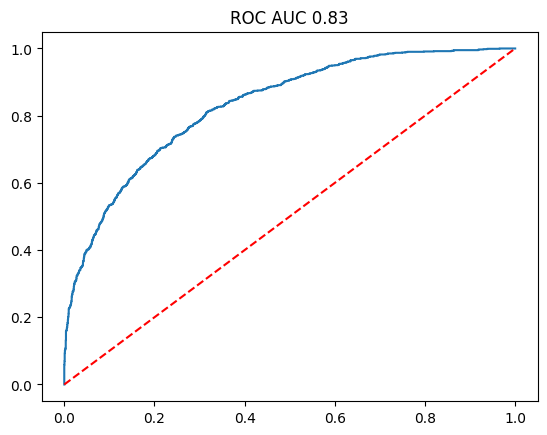

In [39]:
model_training(LogisticRegression(),x_train,y_train,x_test,y_test)

Confusion_matrix :
 [[1585  539]
 [ 246  762]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.75      0.80      2124
           1       0.59      0.76      0.66      1008

    accuracy                           0.75      3132
   macro avg       0.73      0.75      0.73      3132
weighted avg       0.78      0.75      0.76      3132



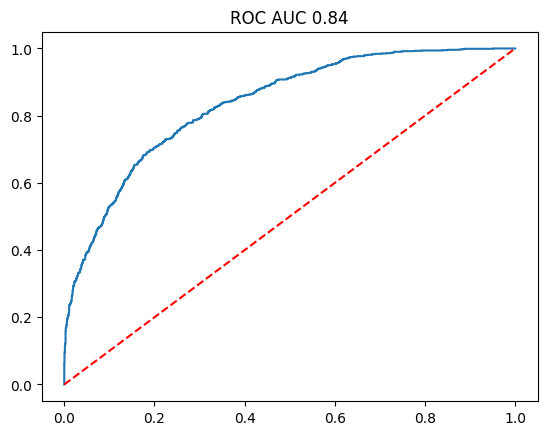

In [40]:
# With Weights
model_training(LogisticRegression(class_weight=weights_dict),x_train,y_train,x_test,y_test)

### Naive Bayes

Confusion_matrix :
 [[1658  466]
 [ 363  645]]

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2124
           1       0.58      0.64      0.61      1008

    accuracy                           0.74      3132
   macro avg       0.70      0.71      0.70      3132
weighted avg       0.74      0.74      0.74      3132



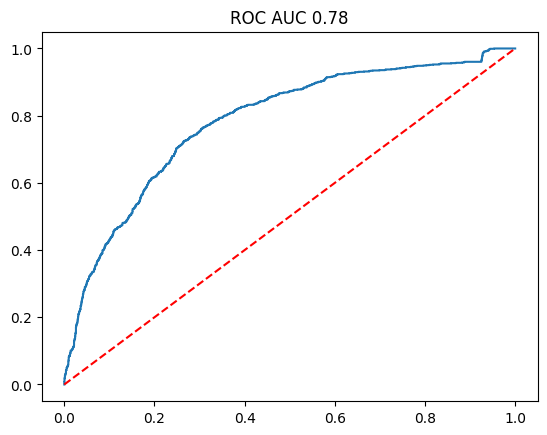

In [41]:
model_training(GaussianNB(),x_train,y_train,x_test,y_test)

Confusion_matrix :
 [[1303  821]
 [ 300  708]]

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.61      0.70      2124
           1       0.46      0.70      0.56      1008

    accuracy                           0.64      3132
   macro avg       0.64      0.66      0.63      3132
weighted avg       0.70      0.64      0.65      3132



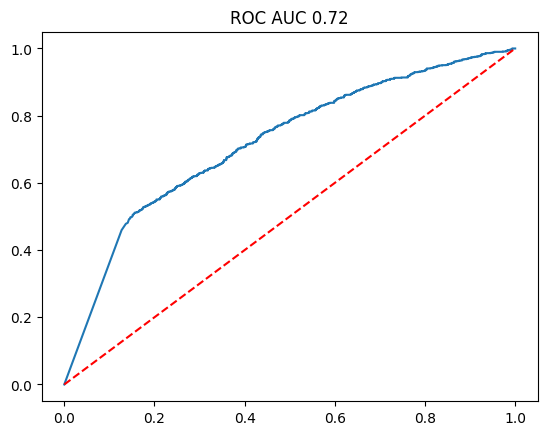

In [42]:
model_training(MultinomialNB(),x_train,y_train,x_test,y_test)

### Decision Tree

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Confusion_matrix :
 [[1889  235]
 [ 292  716]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2124
           1       0.75      0.71      0.73      1008

    accuracy                           0.83      3132
   macro avg       0.81      0.80      0.80      3132
weighted avg       0.83      0.83      0.83      3132



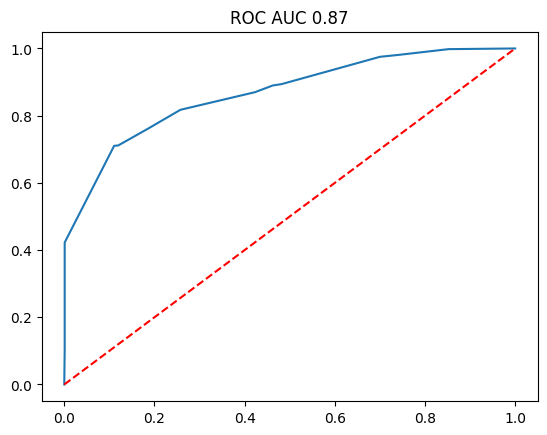

In [43]:
DT_parms=tunning_Parameters(grid={'max_depth':[3,4,5,6,7,8,9]},estimator=DecisionTreeClassifier(class_weight=weights_dict),x=x_train,y=y_train)
model_training(DecisionTreeClassifier(**DT_parms),x_train,y_train,x_test,y_test)

### Random Forest Classifier

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Confusion_matrix :
 [[1830  294]
 [ 270  738]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      2124
           1       0.72      0.73      0.72      1008

    accuracy                           0.82      3132
   macro avg       0.79      0.80      0.80      3132
weighted avg       0.82      0.82      0.82      3132



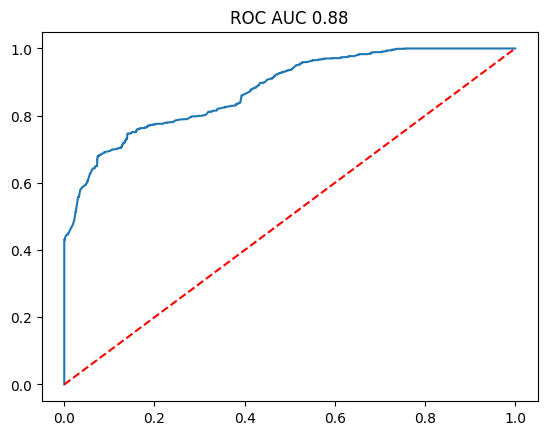

In [44]:
RF_parms=tunning_Parameters(grid={'max_depth':[3,4,5],'n_estimators':[50,100,150]},
                              estimator=RandomForestClassifier(max_features=None,class_weight=weights_dict),x=x_train,y=y_train)
model_training(RandomForestClassifier(**RF_parms,max_features=None,class_weight=weights_dict),x_train,y_train,x_test,y_test)

### AdaBoost

In [45]:
Ada_parms=tunning_Parameters(grid={'n_estimators':[50,70,100,120,150],'learning_rate':[0.1,0.2,0.5]},
                                    estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight=weights_dict)),x=x_train,y=y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


Confusion_matrix :
 [[1726  398]
 [ 312  696]]

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      2124
           1       0.64      0.69      0.66      1008

    accuracy                           0.77      3132
   macro avg       0.74      0.75      0.75      3132
weighted avg       0.78      0.77      0.78      3132



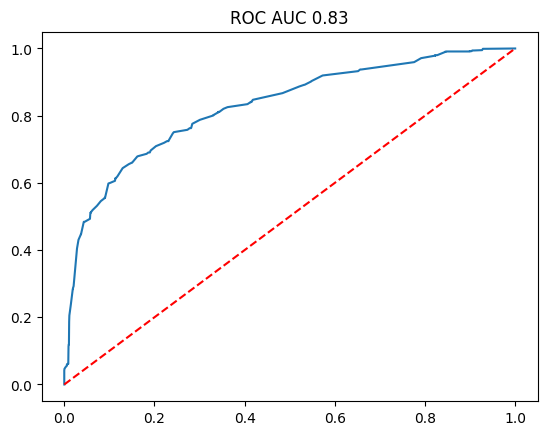

In [46]:
model_training(AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight=weights_dict),**Ada_parms),x_train,y_train,x_test,y_test)

### GradientBoostingClassifier

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Confusion_matrix :
 [[1895  229]
 [ 263  745]]

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      2124
           1       0.76      0.74      0.75      1008

    accuracy                           0.84      3132
   macro avg       0.82      0.82      0.82      3132
weighted avg       0.84      0.84      0.84      3132



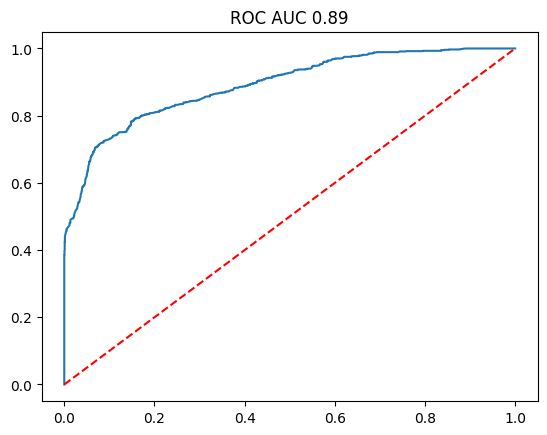

In [47]:
GBC_parms=tunning_Parameters(grid={'n_estimators':[50,100,150],'learning_rate':[0.1,0.5],'max_depth':[3,5,7]},
                              estimator=GradientBoostingClassifier(),x=x_train,y=y_train)
model_training(GradientBoostingClassifier(**GBC_parms),x_train,y_train,x_test,y_test)

### XGBoost

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Confusion_matrix :
 [[1812  312]
 [ 254  754]]

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      2124
           1       0.71      0.75      0.73      1008

    accuracy                           0.82      3132
   macro avg       0.79      0.80      0.80      3132
weighted avg       0.82      0.82      0.82      3132



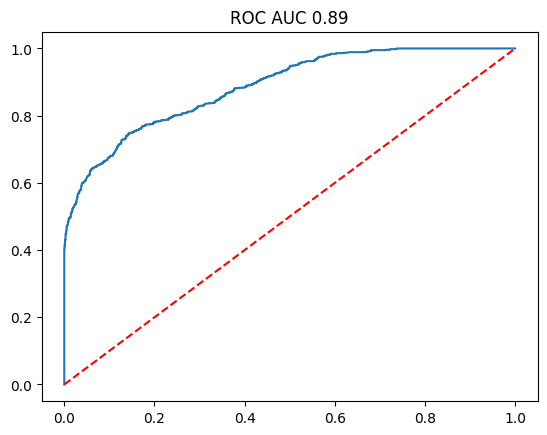

In [48]:
XGB_parms=tunning_Parameters(grid={'n_estimators':[50,100,150],'learning_rate':[0.1,0.5],'gamma':[1,2,3]},
                              estimator=XGBClassifier(),x=x_train,y=y_train)
model_training(XGBClassifier(**XGB_parms),x_train,y_train,x_test,y_test)

### Voting

In [49]:
base_model=[('XGB',XGBClassifier(**XGB_parms,weights=weights_dict)),
            ('DT',DecisionTreeClassifier(**DT_parms)),
            ('GDBoost',GradientBoostingClassifier(**GBC_parms)),
            ("RF",RandomForestClassifier(**RF_parms))]

Confusion_matrix :
 [[1984  140]
 [ 297  711]]

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2124
           1       0.84      0.71      0.76      1008

    accuracy                           0.86      3132
   macro avg       0.85      0.82      0.83      3132
weighted avg       0.86      0.86      0.86      3132



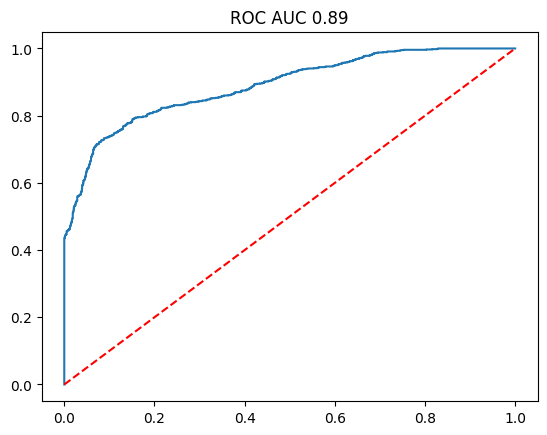

In [50]:
model_training(VotingClassifier(estimators=base_model,voting='soft',weights=(0.8,0.8,1.2,1.2)),x_train,y_train,x_test,y_test)

### Stacking 

Confusion_matrix :
 [[1749  375]
 [ 291  717]]

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      2124
           1       0.66      0.71      0.68      1008

    accuracy                           0.79      3132
   macro avg       0.76      0.77      0.76      3132
weighted avg       0.79      0.79      0.79      3132



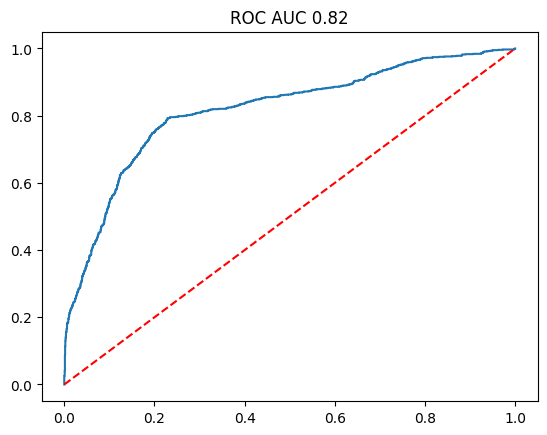

In [51]:
model_training(StackingClassifier(estimators=base_model,final_estimator=LogisticRegression(class_weight=weights_dict)),x_train,y_train,x_test,y_test)

In [52]:
scorecard

,Accuracy,Precision,Recall,F1 Score,Cohen_Kappa Score
LogisticRegression(),0.782248,0.724518,0.521825,0.606690,0.461589
GaussianNB(),0.735313,0.580558,0.639881,0.608778,0.409491
MultinomialNB(),0.642082,0.463048,0.702381,0.558140,0.278086
DecisionTreeClassifier(max_depth=4),0.831737,0.752892,0.710317,0.730985,0.608720
"RandomForestClassifier(class_weight={0: 0.7029012810851545,\n 1: 1.7321262766945218},\n max_depth=5, max_features=None)",0.819923,0.715116,0.732143,0.723529,0.590034
"AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight={0: 0.7029012810851545,\n 1: 1.7321262766945218}),\n learning_rate=0.2, n_estimators=120)",0.773308,0.636197,0.690476,0.662226,0.492065
GradientBoostingClassifier(n_estimators=50),0.842912,0.764887,0.739087,0.751766,0.636916
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=2, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=0.1, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=50, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...)",0.819285,0.707317,0.748016,0.727097,0.592172
"VotingClassifier(estimators=[('XGB',\n XGBClassifier(base_score=None, booster=None,\n callbacks=None,\n colsample_bylevel=None,\n colsample_bynode=None,\n colsample_bytree=None, device=None,\n early_stopping_rounds=None,\n enable_categorical=False,\n eval_metric=None,\n feature_types=None, gamma=2,\n grow_policy=None,\n importance_type=None,\n interaction_constraints=None,\n learning_rate=...\n max_leaves=None,\n min_child_weight=None, missing=nan,\n monotone_constraints=None,\n multi_strategy=None,\n n_estimators=50, n_jobs=None,\n num_parallel_tree=None,\n random_state=None, ...)),\n ('DT', DecisionTreeClassifier(max_depth=4)),\n ('GDBoost',\n GradientBoostingClassifier(n_estimators=50)),\n ('RF', RandomForestClassifier(max_depth=5))],\n voting='soft', weights=(0.8, 0.8, 1.2, 1.2))",0.860473,0.835488,0.705357,0.764927,0.666725
"StackingClassifier(estimators=[('XGB',\n XGBClassifier(base_score=None, booster=None,\n callbacks=None,\n colsample_bylevel=None,\n colsample_bynode=None,\n colsample_bytree=None,\n device=None,\n early_stopping_rounds=None,\n enable_categorical=False,\n eval_metric=None,\n feature_types=None, gamma=2,\n grow_policy=None,\n importance_type=None,\n interaction_constraints=None,\n learning_rat...\n monotone_constraints=None,\n multi_strategy=None,\n n_estimators=50, n_jobs=None,\n num_parallel_tree=None,\n random_state=None, ...)),\n ('DT', DecisionTreeClassifier(max_depth=4)),\n ('GDBoost',\n GradientBoostingClassifier(n_estimators=50)),\n ('RF', RandomForestClassifier(max_depth=5))],\n final_estimator=LogisticRegression(class_weight={0: 0.7029012810851545,\n 1: 1.7321262766945218}))",0.787356,0.656593,0.711310,0.682857,0.523299


### Final Model

Lets Fine Tune the GDB Classifier as it has the maximum F1 score among the all models

In [53]:
final_parms=tunning_Parameters(grid={'n_estimators':[45,50,55,60],'learning_rate':[0.09,0.1,0.11],'max_depth':[3,4,5]},
                              estimator=GradientBoostingClassifier(),x=x_train,y=y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [54]:
final_model=GradientBoostingClassifier(**final_parms)
final_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.11, n_estimators=45)

In [55]:
final_model.score

<bound method ClassifierMixin.score of GradientBoostingClassifier(learning_rate=0.11, n_estimators=45)>

## Business Interpretations

In [56]:
fi=final_model.feature_importances_

In [57]:
fi_pd=pd.DataFrame({"Feature_Importance":fi},index=x_train.columns).sort_values(by='Feature_Importance',ascending=False)

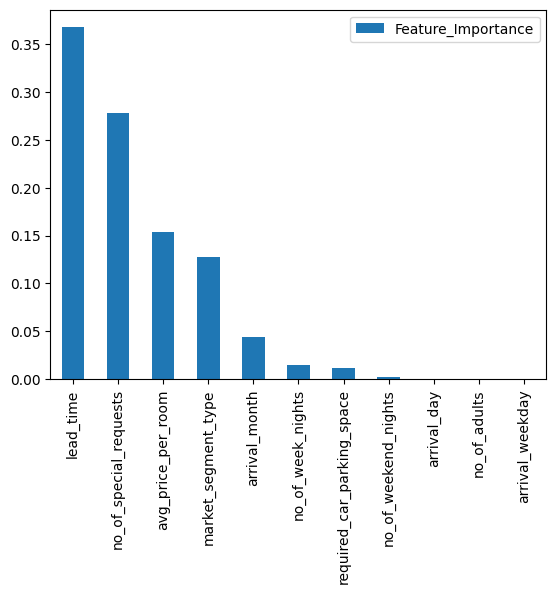

In [58]:
fi_pd.plot(kind='bar')
plt.show()

## Deployment

Save the final Model as a pickle file

In [59]:
with open('final_model_xgb.pkl','wb') as file:
    pickle.dump(final_model,file)